# Setting up Path

In [ ]:
%pwd

'/content'

In [ ]:
project_path = '/content/drive/MyDrive/ML_IE_7374/Project/GitHub/credit-card-default-prediction'

In [ ]:
%cd {project_path}

/content/drive/MyDrive/ML_IE_7374/Project/GitHub/credit-card-default-prediction


In [ ]:
%ls dataset/

default_of_credit_card_clients.xls


# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [ ]:
sns.set(style=)

# Loading Dataset

In [ ]:
raw_data = pd.read_excel('dataset/default_of_credit_card_clients.xls', header=1)
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **1. Exploratory Data Analysis(EDA)**

In [ ]:
df_eda = raw_data.copy()
print(f'Data - rows: {df_eda.shape[0]} columns:{df_eda.shape[1]}')

Data - rows: 30000 columns:25


## **1.1 Descriptive Statistics**

In [ ]:
df_eda.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Note:<br>
There is `PAY_0` column instead of `PAY_1` column. It can be renamed in the pre-processing step(1).

### **1.1.1 Glimpse of the Dataset**

In [ ]:
df_eda.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


- All the columns have numerical data 

### **1.1.2 Shape of the Dataset**

In [ ]:
df_eda.shape

(30000, 25)

- The dataset has 30,000 examples with 25 columns(variables)

## **1.2 Checking for missing values**

In [ ]:
df_eda.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

- There are no missing values

## 1.3 Univariate Analysis

In [ ]:
df_eda.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
def basic_details(df):
    no_of_obs = df.shape[0]
    unique_values = pd.Series( [list(df.unique())]  )
    min = pd.Series(df.min())
    mean = pd.Series(df.mean())
    max = pd.Series(df.max())
    nulls = pd.Series(df.isnull().sum())
    distinct_values = pd.Series( df.unique().shape[0])
    missing_ration = pd.Series(df.isnull().sum()/no_of_obs*100)
    skewness = pd.Series(df.skew())
    kurtosis = pd.Series(df.kurt())
    details_df = pd.concat([min, mean, max, distinct_values, nulls, missing_ration,  skewness, kurtosis], axis=1)
    column_names = ['min','mean', 'max','distinct values','# of missing values','missing ration','skewness','kurtosis']
    details_df.columns = column_names

    return details_df

**My Terminology:**<br>
 <u>Variable</u> - A Column of the Dataset<br>
 <u>Feature</u> - A Variable which significantly explains the target variable and is pre-processed before applying ML algorithms. 

#### **1. ID**
`ID` - ID of each client

In [ ]:
id_uniques = df_eda['ID'].unique()
id_uniques

array([    1,     2,     3, ..., 29998, 29999, 30000])

In [ ]:
len(id_uniques)

30000

- The variable-`ID` indicate the serial number of each example in the dataset. 
- It doesn't play any significant role in explaining the target variable - default/not defult. 
- Hence, it cannot be selected as a feature and can be dropped in the pre-processing step(2).

#### **2. LIMIT_BAL**
`LIMIT_BAL`: Amount of given credit in New Taiwan(NT) dollars (includes individual and family/supplementary
credit) 

In [ ]:
basic_details(df_eda['LIMIT_BAL'])

,min,mean,max,distinct values,# of missing values,missing ration,skewness,kurtosis
0,10000,167484.322667,1000000,81,0,0.0,0.992867,0.536263


In [ ]:
sns.set(style='darkgrid',palette='muted',color_codes=True)

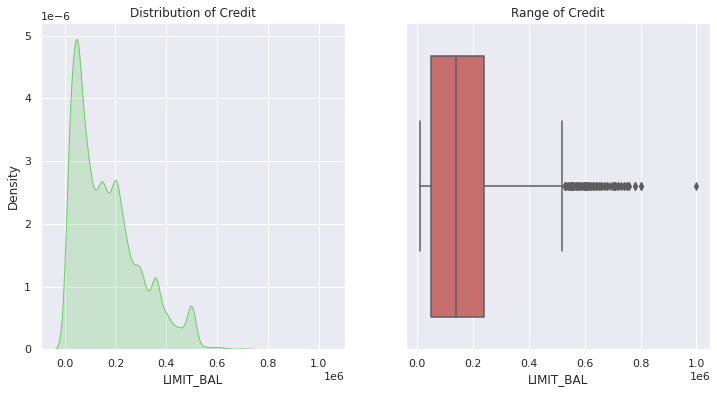

In [224]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.kdeplot(data=df_eda, x="LIMIT_BAL", color='g',fill=True, ax=axes[0])
sns.boxplot(x=df_eda.LIMIT_BAL, color='r', ax=axes[1])
axes[0].set_title('Distribution of Credit')
axes[1].set_title('Range of Credit')
plt.show()

<u>Observations:</u>
- The **range** of this variable is very high with min value-10,000  and min value 1000,000
- The Skewness 
- The Kurtosis 
- It is better normalize the data in pre-processing
- The box plot shows lot of outliers

#### **25. default payment next month**

In [ ]:
df_eda['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Ratio of classes: non-default and default